# Coding Discussion 04
## Vince Egalla (ve68)

For this coding discussion, let's play around with some of the linear algebra concepts that we've covered in class. Specifically, let's return to our discussion of representing text as vectors and analyzing the angle between those vectors (which as we saw, offers a measure of similarity).

In the `Data/` folder, there are five separate news reports on Turkish President Erdogan addressing the murder of journalist Jamal Khashoggi in `.txt` files. Each contains the same story (relatively speaking) from different sources with different political leanings/interests. In addition to this, I also include `stop-words.csv` file containing common English words that we want to purge from our text (recall there are words that are common to all sentences, like "the" and "and", that we want to remove when comparing documents).

Use what we know about (a) reading in text files, (b) data manipulation, and (c) linear algebra to analyze the difference between these documents. Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

This discussion is largely open. Probe the data however you see fit. The only restriction is that you must calculate the cosine similarity on your own. Don't rely on any canned functions that do this for you.


#### Dependencies

In [1]:
import pandas as pd
import numpy as np

#### Load Stop Words

In [2]:
## Read stop_words.csv into data frame
stop_words = pd.read_csv(r"C:\Georgetown\2020 Fall\PPOL 564\coding_discussions_ppol564_fall2020\04_coding_discussion\Data\stop_words.csv")

## Check on data frame
stop_words.head()

,word
0,a
1,a's
2,able
3,about
4,above


In [3]:
## Convert data frame to a list
stop_list = stop_words['word'].tolist()

In [4]:
## Check conversion
stop_list

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [5]:
def tokenize(text):
    '''
    GOAL: Tokenize text object into list after removing punctuation, conversion to lower case,
            and removal of common words
    INPUT: Text object
    OUTPUT: List of words from text object
    '''
    text = text.lower()
    text = text.replace('.','')
    text = text.replace('\\','')
    text = text.replace('-','')
    text = text.replace(',','')
    text = text.replace('\"','')
    text = text.replace('[','')
    text = text.replace(']"','')
    text = text.replace('?','')
    text = text.replace('\'','')
    text = text.replace('“','')
    text = text.replace('”','')
    text_list0 = text.split()
    text_list1 = [i for i in text_list0 if i not in stop_list]
    return text_list1

In [6]:
def generateDTM(filenames= None):
    '''
    GOAL: Create document text matrix from a list of files
    INPUT: List of filenames of text objects
    OUTPUT: Pandas data frame of document text matrix
    '''
    ## Create empty data frame
    DTM = pd.DataFrame()
    ## Loop through each filename
    for filename in filenames:
        ## Open file and store in memory
        with open("C:\\Georgetown\\2020 Fall\\PPOL 564\\coding_discussions_ppol564_fall2020\\04_coding_discussion\\Data\\"+filename+".txt",encoding="utf-8") as f: 
            content = f.read()
        ## Tokenize text
        content_list = tokenize(content)
        ## Convert to dictionary with count of words
        content_dict = dict()
        for word in content_list:
            if word in content_dict:
                content_dict[word][0] += 1
            else:
                content_dict[word] = [1]
        ## Append filename's DTM to cumulative DTM
        DTM = DTM.append(pd.DataFrame(content_dict), ignore_index= True, sort= True)
    ## Replace null values with 0 if specific words are not found in a text
    DTM.fillna(0, inplace= True)    
    return DTM

In [7]:
## List of filenames
files = ["aljazeera-khashoggi","bbc-khashoggi","breitbart-khashoggi","cnn-khashoggi","fox-khashoggi"]

In [8]:
## Generate document text matrix from all files
khashoggiDTM = generateDTM(files)
khashoggiDTM

,$50bn,(2r),(90kilometer),(ak,(cnn),(l),(r),(£385bn),1,11,...,white,widely,withheld,woods,world,worse,writer,yalova,yelova,—
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,3.0


In [9]:
## List for conversion to print statements
indexFilename = [[0,"Aljazeera"],[1,"BBC"],[2,"Breitbart"],[3,"CNN"],[4,"Fox"]]

In [10]:
## Create empty list to add values to
similarityData = []

## Loop through permutations of indices
for i in range(0,5):
    for j in range(0,5):
        if i != j and i < j:
            a = khashoggiDTM.iloc[i]
            b = khashoggiDTM.iloc[j]
            cosine = a.dot(b)/(np.sqrt(a.dot(a))*np.sqrt(b.dot(b)))
            print("The cosine similarity between the articles from "+indexFilename[i][1]+" and "+indexFilename[j][1]+" is "+str(round(cosine,3)) + ".")
            similarityData.append([indexFilename[i][1],indexFilename[j][1],cosine])
        elif i == j:
            similarityData.append([indexFilename[i][1],indexFilename[j][1],0])

The cosine similarity between the articles from Aljazeera and BBC is 0.68.
The cosine similarity between the articles from Aljazeera and Breitbart is 0.582.
The cosine similarity between the articles from Aljazeera and CNN is 0.535.
The cosine similarity between the articles from Aljazeera and Fox is 0.679.
The cosine similarity between the articles from BBC and Breitbart is 0.581.
The cosine similarity between the articles from BBC and CNN is 0.502.
The cosine similarity between the articles from BBC and Fox is 0.627.
The cosine similarity between the articles from Breitbart and CNN is 0.367.
The cosine similarity between the articles from Breitbart and Fox is 0.547.
The cosine similarity between the articles from CNN and Fox is 0.517.


In [11]:
## Convert to data frame for visualization
similarityDF = pd.DataFrame(similarityData).rename(columns={0:'source1',1:'source2',2:'cosine_similarity'})

In [12]:
## Resort by cosine similarity
similarityDF.sort_values(by= 'cosine_similarity')

,source1,source2,cosine_similarity
0,Aljazeera,Aljazeera,0.000000
5,BBC,BBC,0.000000
9,Breitbart,Breitbart,0.000000
12,CNN,CNN,0.000000
14,Fox,Fox,0.000000
10,Breitbart,CNN,0.367165
7,BBC,CNN,0.502156
13,CNN,Fox,0.517322
3,Aljazeera,CNN,0.534672
11,Breitbart,Fox,0.547029


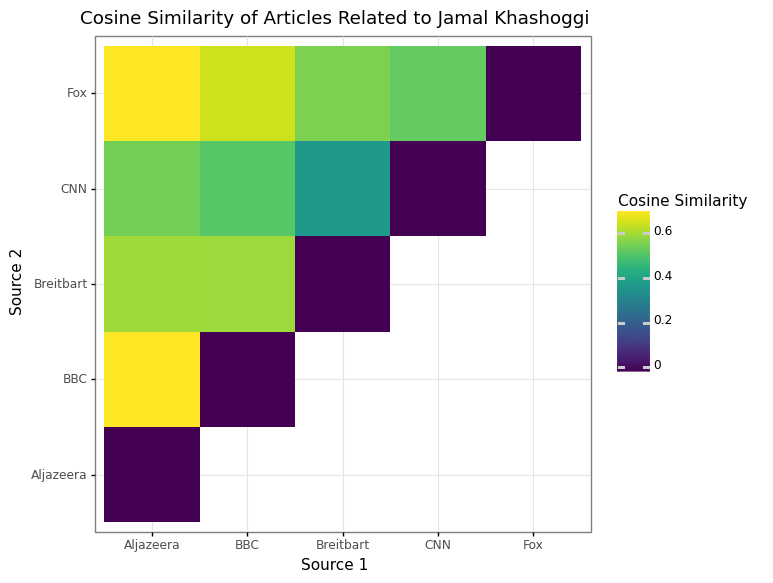

<ggplot: (100641340775)>

In [13]:
from plotnine import *
(
    ggplot(similarityDF, aes(x= 'source1', y= 'source2', fill= 'cosine_similarity')) +
        geom_tile() +
        labs(x= "Source 1", y= "Source 2", fill= "Cosine Similarity", title= "Cosine Similarity of Articles Related to Jamal Khashoggi") +
        theme_bw() +
        coord_equal()
)
## How can I add symmetry to this visualization?